# vde analysis 2

## Score fn vis

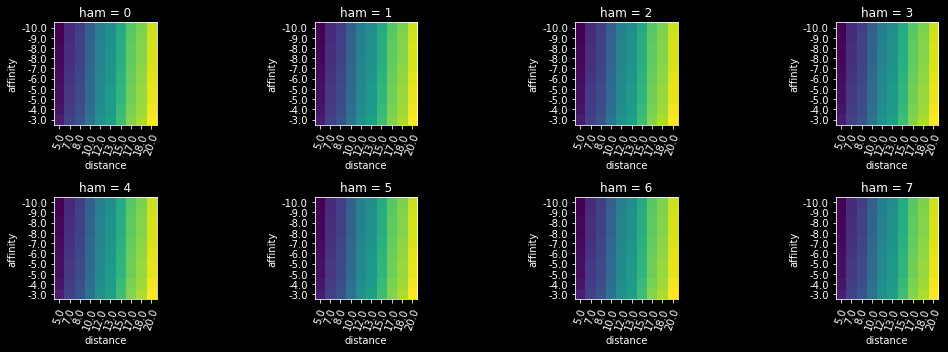

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def fna(d, a, h):
    return np.mean(d) - np.log(abs(a).mean()) - h

fig, ax = plt.subplots(2,4,figsize=(15,5))
dists = np.linspace(5,20,10).round()
affs = np.linspace(-10,-3,10).round()
for h,p in zip(range(9), ax.flatten()):
    array = np.array(\
        [[fna(di, ai,h) for di in dists] for ai in affs]\
                    )
    p.imshow(array)
    p.set_title(f'ham = {h}')
    p.set_xticks(range(len(dists)),dists,rotation=70)
    p.set_yticks(range(len(affs)),affs)
    p.set_xlabel('distance')
    p.set_ylabel('affinity')
plt.tight_layout()
plt.savefig('sxfna-heatmaps.png')
plt.show()

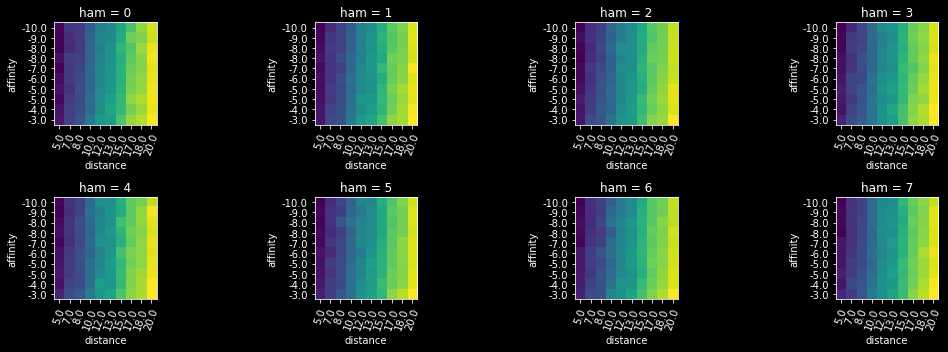

In [2]:
def fnb(d, a_arr, h):
    def softmax(arr):
        e = np.exp(arr - max(arr))
        return e / sum(e)
    return np.mean(d* softmax(abs(a_arr))) - h
            
fig, ax = plt.subplots(2,4,figsize=(15,5))
dists = np.linspace(5,20,10).round()
affs = np.linspace(-10,-3,10).round()
for h,p in zip(range(9), ax.flatten()):
    affs_arr = lambda a_mean : np.random.randn(8) * a_mean
    array = np.array(\
        [[fna(di, affs_arr(ai),h) for di in dists] for ai in affs]\
                    )
    p.imshow(array)
    p.set_title(f'ham = {h}')
    p.set_xticks(range(len(dists)),dists,rotation=70)
    p.set_yticks(range(len(affs)),affs)
    p.set_xlabel('distance')
    p.set_ylabel('affinity')
plt.tight_layout()
plt.savefig('sxfnb-heatmaps.png')
plt.show()

## Getting all individual `vina` scores
Looking to see if there are distinct clusters of affinities

In [9]:
import os
import time

start_t = time.time()
paths_ = os.popen('find . -name scores.csv').read().splitlines()
end_t = time.time()
print(f'time: {end_t - start_t}')
print(len(paths_))
set(map(lambda p : len(p.split('/')), paths_))

time: 5.427765369415283
54804


{5, 6}

In [12]:
paths = [i for i in paths_ if len(i.split('/')) == 6]

In [13]:
import random
random.choices(paths, k=5)

['./experiment-b/runs/ehpos/RTYLVTKYPTVALFTERTIAAAAAL/scores.csv',
 './experiment-a/runs/lsnfi/RTYLVTKHPTVAHFPARTEAAAAGL/scores.csv',
 './experiment-b/runs/jmybd/PTYLVMKHPTCAVFSERTIASCAGL/scores.csv',
 './experiment-a/runs/yrpxa/RTYLVMKHQTVALFRERIIAANAGL/scores.csv',
 './experiment-a/runs/yrpxa/RTYLVLKHPTRGLFSERTIAAAAGL/scores.csv']

In [14]:
import pandas as pd
pd.read_csv(paths[0],index_col=0)

,mode,affinity (kcal/mol),dist from best mode - rmsd - ub,dist from best mode - lb
0,1.0,-7.0,0.000,0.000
1,2.0,-6.5,17.003,19.884
2,3.0,-6.5,16.514,19.176
3,4.0,-6.4,15.403,18.431
4,5.0,-6.2,17.641,19.633
5,6.0,-6.1,17.471,20.091
6,7.0,-6.1,19.889,21.274
7,8.0,-6.0,18.969,20.839
8,9.0,-5.9,15.214,17.543


In [16]:
all_vina_scores = pd.concat([pd.read_csv(i,index_col=0) for i in paths])
all_vina_scores.reset_index(inplace=True,drop=True)
all_vina_scores

,mode,affinity (kcal/mol),dist from best mode - rmsd - ub,dist from best mode - lb
0,1.0,-7.0,0.000,0.000
1,2.0,-6.5,17.003,19.884
2,3.0,-6.5,16.514,19.176
3,4.0,-6.4,15.403,18.431
4,5.0,-6.2,17.641,19.633
...,...,...,...,...
493033,1.0,-6.2,0.000,0.000
493034,2.0,-4.7,2.439,4.257
493035,3.0,-4.5,16.969,18.491
493036,4.0,-4.2,17.136,18.707


In [17]:
all_vina_scores.describe()

,mode,affinity (kcal/mol),dist from best mode - rmsd - ub,dist from best mode - lb
count,493032.000000,493031.000000,493030.000000,493030.000000
mean,4.999831,-7.458121,8.041614,9.895106
std,2.582030,0.664397,8.457152,8.758660
min,1.000000,-10.400000,0.000000,0.000000
25%,3.000000,-8.000000,1.667000,2.553000
50%,5.000000,-7.400000,2.713000,6.272000
75%,7.000000,-6.900000,17.388000,19.356000
max,17.857000,14.160000,42.055000,43.638000


## cleaning
The +14 value in affinities shouldn't be there. 
There are also some `NaN`s to drop.

In [18]:
all_vina_scores.sort_values('affinity (kcal/mol)')

,mode,affinity (kcal/mol),dist from best mode - rmsd - ub,dist from best mode - lb
455575,1.000,-10.4,0.000,0.000
447900,1.000,-10.1,0.000,0.000
461830,1.000,-9.9,0.000,0.000
455576,2.000,-9.9,2.604,3.002
65972,1.000,-9.8,0.000,0.000
...,...,...,...,...
149438,NaN,NaN,NaN,NaN
193710,NaN,NaN,NaN,NaN
261427,17.857,NaN,NaN,NaN
389299,NaN,NaN,NaN,NaN


In [19]:
all_vina_scores.dropna(inplace=True)
all_vina_scores = all_vina_scores.loc[all_vina_scores['affinity (kcal/mol)'] < 0, :]

## Distribution of Affinities

I think the gaps are a float precision artifact - vina scores have one decimal place.
That might explain the apparent clusters of scores in `evo-a-b.ipynb`.

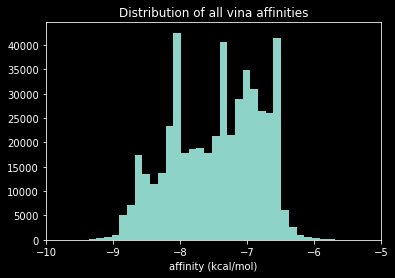

In [21]:
plt.hist(all_vina_scores['affinity (kcal/mol)'], bins=60)
plt.xlabel('affinity (kcal/mol)')
plt.title('Distribution of all vina affinities')
plt.xlim(-10,-5)
plt.savefig('exp-a-b-aff-distr.png')
plt.show()

In [22]:
os.path.dirname(paths[0])

'./round-0/runs/crvnc/RTYLVTKHPTVALFSERTIAIAAGL'

In [41]:
import os.path as osp
import re

def get_dists(path):
    ls = lambda p : [osp.join(p, i) for i in os.listdir(p)]
    grep = lambda regex, filename : os.popen(f'grep {regex} {filename}').read().splitlines()
    calc_dist = lambda a, b : np.linalg.norm(a - b)
    prot_cols =  ['record','idx','type','resn','chain','1','x','y','z','n','m','element']
    lig_cols =   ['record','idx','type','resn','1','x','y','z','n','m','element']
    get_atom_df = lambda filename, cols=prot_cols, record='ATOM': pd.DataFrame(\
                               [i.split() for i in grep(record, filename)], 
                                                    columns=cols)
    loc = lambda atom_name, df : df.loc[df.element==atom_name,list('xyz')].astype(float)
    idx_atoms = lambda df : pd.Data
    locn = lambda atom_name, df : df.where(\
                    (df.element==atom_name[0]) & (df.idx==atom_name[1:])).dropna()
    get_coords= lambda df : df[list('xyz')].astype(float)
    get_mode_no = lambda s : int(re.findall('[0-9]+',osp.basename(s))[0])
    
    dir_ = ls(path)
    scores_csv = [i for i in dir_ if 'csv' in i][0]
    receptor = get_atom_df((p:=[i for i in dir_ if 'clean_receptor' in i][0])).\
                            append(get_atom_df(p,record='HETATM'))
    poses = {get_mode_no(i):get_atom_df(i,cols=lig_cols) for i in dir_ if 'mode' in i}
    
    scores_df = pd.read_csv(scores_csv,index_col=0)
    scores_df['mode'] = scores_df['mode'].astype(int)
    scores = dict(zip(scores_df['mode'], scores_df['affinity (kcal/mol)']))
    
    fe = loc('FE',receptor).values
    data = {i:{'C20':calc_dist(fe, get_coords(locn('C20',poses[i]))),
              'C19':calc_dist(fe, get_coords(locn('C19',poses[i]))),
              'aff':scores[i]} for i in poses}
    #c20 = locn('C20', poses[0])
    return pd.DataFrame(data).T
    


,C20,C19,aff
2,11.384371,11.036086,-6.5
1,9.859385,9.875873,-7.0
5,14.814559,15.632476,-6.2
9,17.399498,16.935045,-5.9
6,25.702500,24.591699,-6.1
7,17.868757,16.900585,-6.1
8,18.148168,17.469829,-6.0
3,16.386402,16.337479,-6.5
4,13.382713,12.178109,-6.4


In [15]:
import time
from multiprocessing.pool import ThreadPool

o = {}
def helper(path):
    try: 
        o[osp.dirname(path)] = get_dists(path)
    except Exception as e:
        print(path, e)

start_time = time.time()
with ThreadPool() as pool:
    pool.map(helper, paths[:100])
fin_time = time.time()
print(f'time = {fin_time - start_time} s')
len(o)

./round-0/runs/crvnc/RTYLVTKHPTVALFSERYIAAAAGL/scores.csv 9
time = 38.742316007614136 s


99

In [16]:
def add_id_col(ID, df):
    df['id'] = ID
    return df
pd.concat([add_id_col(i,j) for i,j in zip(o.keys(), o.values())])

,C20,C19,aff,id
2,25.944655,25.361051,-6.6,./round-0/runs/crvnc/CTYLVTKHPTVALFSERTIAAAAGL
1,12.923659,14.237934,-7.2,./round-0/runs/crvnc/CTYLVTKHPTVALFSERTIAAAAGL
5,16.353841,17.157062,-6.3,./round-0/runs/crvnc/CTYLVTKHPTVALFSERTIAAAAGL
9,12.235649,11.169231,-6.2,./round-0/runs/crvnc/CTYLVTKHPTVALFSERTIAAAAGL
6,17.831240,16.822071,-6.3,./round-0/runs/crvnc/CTYLVTKHPTVALFSERTIAAAAGL
...,...,...,...,...
6,15.568819,14.169425,-6.2,./round-0/runs/crvnc/RTYLVTKHPTVALFSERTIAAAAGV
7,16.575856,15.092221,-6.1,./round-0/runs/crvnc/RTYLVTKHPTVALFSERTIAAAAGV
8,17.889789,16.943759,-5.9,./round-0/runs/crvnc/RTYLVTKHPTVALFSERTIAAAAGV
3,15.394702,16.233934,-6.5,./round-0/runs/crvnc/RTYLVTKHPTVALFSERTIAAAAGV


### Checking that $C_{20}$ in the `obabel`-generated poses map to $C_5$
it should be equidistant between 2 oxygen atoms

In [26]:
start_t = time.time()
mode_paths = os.popen('find . -name mode*pdb').read().splitlines()
end_t = time.time()
print(f'time: {end_t - start_t}')
print(len(mode_paths))
print(mode_paths[0])

time: 6.032302618026733
493031
./round-0/runs/crvnc/RTYLVTKHPTVALFSERTIAIAAGL/mode2.pdb


In [44]:
def get_coords(path):
    grep = lambda regex, filename : os.popen(f'grep {regex} {filename}').read().splitlines()
    calc_dist = lambda a, b : np.linalg.norm(a - b)
    prot_cols =  ['record','idx','type','resn','chain','1','x','y','z','n','m','element']
    lig_cols =   ['record','idx','type','resn','1','x','y','z','n','m','element']
    get_atom_df = lambda filename, cols=prot_cols, record='ATOM': pd.DataFrame(\
                               [i.split() for i in grep(record, filename)], 
                                                    columns=cols)
    loc = lambda atom_name, df : df.loc[df.element==atom_name,list('xyz')].astype(float)
    idx_atoms = lambda df : pd.Data
    locn = lambda atom_name, df : df.where(\
                    (df.element==atom_name[0]) & (df.idx==atom_name[1:])).dropna()
    get_coords= lambda df : df[list('xyz')].astype(float)
    get_mode_no = lambda s : int(re.findall('[0-9]+',osp.basename(s))[0])
    
    
    return get_atom_df(path,cols=lig_cols)
get_coords(mode_paths[0])

,record,idx,type,resn,1,x,y,z,n,m,element
0,ATOM,1,C,UNL,1,19.154,1.553,8.702,1.00,0.00,C
1,ATOM,2,C,UNL,1,18.165,2.434,9.171,1.00,0.00,C
2,ATOM,3,C,UNL,1,18.164,3.850,8.830,1.00,0.00,C
3,ATOM,4,C,UNL,1,19.218,4.414,8.126,1.00,0.00,C
4,ATOM,5,C,UNL,1,20.097,3.416,7.732,1.00,0.00,C
5,ATOM,6,C,UNL,1,20.155,2.062,7.964,1.00,0.00,C
6,ATOM,7,C,UNL,1,19.251,-0.582,10.456,1.00,0.00,C
7,ATOM,8,S,UNL,1,19.099,-0.209,8.745,1.00,0.00,S
8,ATOM,9,O,UNL,1,20.281,-0.711,8.084,1.00,0.00,O
9,ATOM,10,O,UNL,1,17.769,-0.559,8.264,1.00,0.00,O


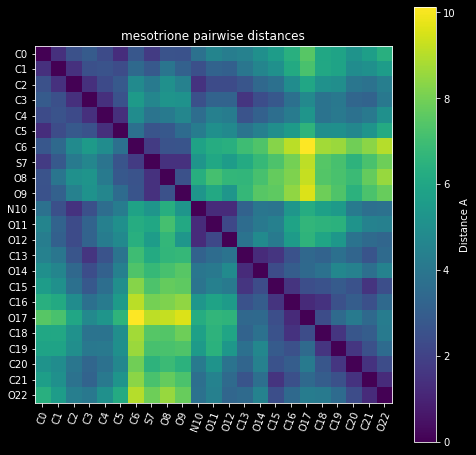

In [49]:
calc_dist = lambda a, b : np.linalg.norm(a - b)
mes = get_coords(mode_paths[0])
mes.index = [f'{i}{j}' for i, j in zip(mes.element, mes.index)]

coords = [mes.loc[i,list('xyz')].astype(float) for i in mes.index]
pairdists = np.array([[calc_dist(i,j) for i in coords] for j in coords])

plt.figure(figsize=(8,8))
plt.imshow(pairdists)
plt.xticks(range(len(mes)), mes.index, rotation=70)
plt.yticks(range(len(mes)), mes.index)
plt.title('mesotrione pairwise distances')
plt.colorbar(label='Distance A')
plt.savefig('mesotrione-pairwise-distances.png')
plt.show()

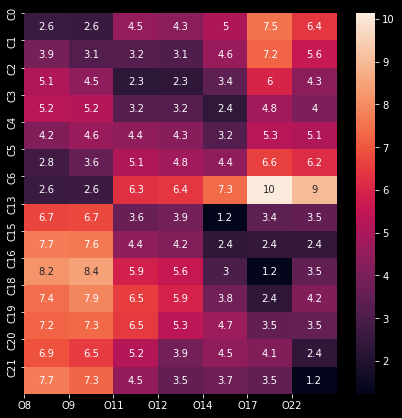

In [50]:
import seaborn as sns

get_coords = lambda atom_name : mes.loc[atom_name,list('xyz')].astype(float)

carbons = [i for i in mes.index if 'C' in i]
oxygens = [i for i in mes.index if 'O' in i]

codists = pd.DataFrame([[round(calc_dist(get_coords(i), get_coords(j)),2) for j in oxygens] \
                          for i in carbons],
                      columns=oxygens,
                      index=carbons)
plt.figure(figsize=(7,7))
sns.heatmap(codists, annot=True)
plt.xticks(range(len(oxygens)), oxygens)
plt.yticks(range(len(carbons)), carbons)
plt.savefig('carbon-oxygen-distances.png')
plt.show()

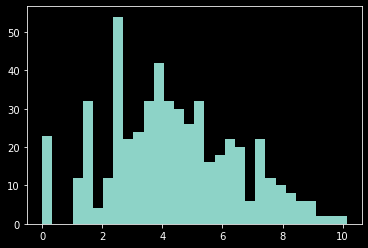

In [51]:
import networkx as nx

plt.hist(pairdists.flatten(), bins=30)
plt.show()

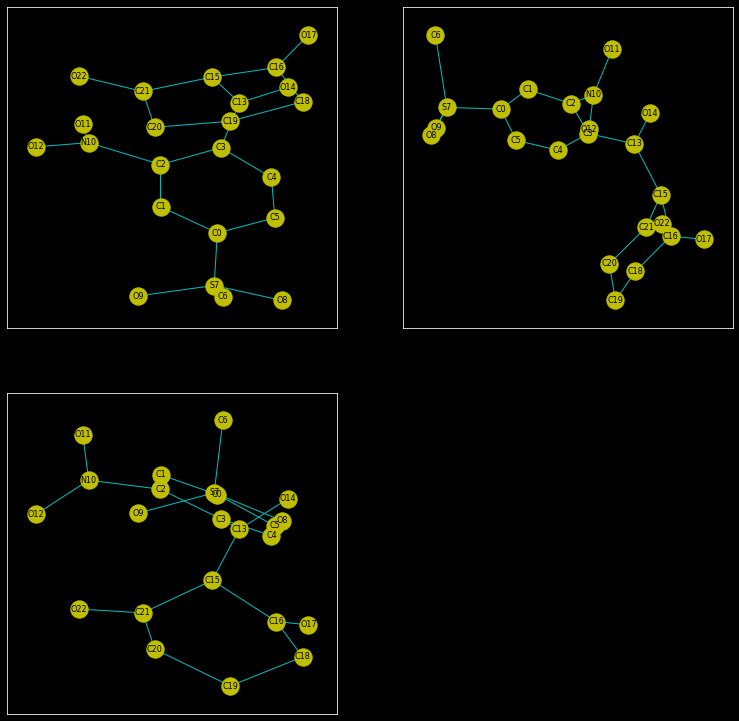

In [54]:
pddf = pd.DataFrame(pairdists, index=mes.index, columns=mes.index)

adj = pddf.where((0 < pddf) & (pddf < 2)) > 0 
G = nx.from_pandas_adjacency(adj)

fig, ax = plt.subplots(2,2, figsize=(13,13))
for i, j in zip(['xy','yz','xz'], ax.flatten()):
    nx.draw_networkx(G,
                     pos=dict(zip(G.nodes, 
                                  mes[list(i)].astype(float).values)),
                     edge_color='c',
                     node_color='y',
                     font_size=8,
                     ax=j,
                    )
ax[1][1].axis('off')
plt.savefig('lig-nxgraph.png')
plt.show()

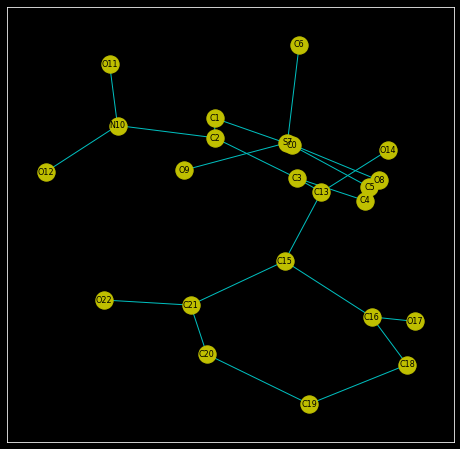

In [56]:
plt.figure(figsize=(8,8))
nx.draw_networkx(G,
                 pos=dict(zip(G.nodes, 
                              mes[list('xz')].astype(float).values)),
                 edge_color='c',
                 node_color='y',
                 font_size=8,
                )
plt.savefig('lig-nxgraph.png')
plt.show()


![](https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?cid=175967&t=l)

maybe it's c19 i want. shite. I wonder how much of a difference that makes.
Maye i'll look if they correlate

In [ ]:
nx.draw_networkx?